In [44]:
#%% Import libraries
from sys import path
import numpy as np
from sympy import *
from sympy.physics.vector import dynamicsymbols
import control as ctl
import matplotlib.pyplot as plt
# from sympy.physics.mechanics import ReferenceFrame
from IPython.display import display, Latex, Math
init_printing(use_latex='mathjax')

path.append(
    "c:\\Users\\diego\\Dropbox\\Academic\\MEng Space Systems\\3. DOCA\\ADCS functions")
import ADCS_Functions_sym as adcs_sym
import ADCS_Functions as adcs

_____________________

Consider the modified proportional-derivative attitude control about a single spacecraft axis, where 

* $I = 10$ kg∙m2 is the corresponding moment of inertia, 
* $y = \theta$ is the corresponding attitude angle,   
* $r = \theta_d$ is the desired attitude angle, 
* $K_p = 0.1$ is the proportional gain and         
* $K_d = 0.5$ is the derivative gain. 

With regards to a unit step input:

a) Determine the settling time

b)  Determine the percent overshoot.

c)  Determine the rise time. 

d)  Is it possible to reduce both the settling time and percent overshoot 
without changing the proportional gain? Illustrate your reasoning with 
a diagram.

In [45]:
I = 10 # kg.m^2
y_sym = dynamicsymbols('theta') # attitude angle
r_sym = Symbol('theta_d') # desired attitude angle
Kp = 0.1 # proportional gain
Kd = 0.5 # derivative gain

_____________

a) Determine the settling time:

In [49]:
# a) Determine the settling time:

omega_n = np.sqrt(Kp/I)
xiomega_n = 1/2*Kd/I

omega_n, xiomega_n

(0.1, 0.025)

In [50]:
ts = 4.4 / xiomega_n # Settling time
ts # s

176.0

b) Determine the maximum overshoot:

In [51]:
# b) Determine the maximum overshoot:

xi = xiomega_n / omega_n

omega_d = omega_n * np.sqrt(1 - xi**2)
omega_d # rad/s

0.09682458365518543

In [52]:
tp = np.pi/omega_d # peak tme
tp # s

32.44622940778889

In [53]:
Mp = adcs_sym.max_overshoot_CLTF(known_real_part='n', subs=True, xi=xi) # max overshoot
Mp


0.444344225088489

c) Determine the rise time

In [54]:
tr = adcs.rise_time_CLTF(xi=xi, omega_d=omega_d)
tr # s

18.83278515744301

d) Is it possible to reduce both the settling time and percent overshoot 
without changing the proportional gain? Illustrate your reasoning with 
a diagram.

In [55]:
I_sym, s_sym, Kd_sym, Kp_sym = symbols('I s K_d K_p')

# From the block diagram
Gs = 1/ (I_sym*s_sym**2)
Hs = Kd_sym * s_sym
Fs = Kp_sym 

TF_sym = ( Gs / (1+Gs*Hs))* Fs
TF_sym 

      Kₚ      
──────────────
   2 ⎛    K_d⎞
I⋅s ⋅⎜1 + ───⎟
     ⎝    I⋅s⎠

In [56]:
TF = TF_sym.subs(Symbol('K_p'), Kp).subs(
    Symbol('K_d'), Kd).subs(Symbol('I'), I).simplify()
TF

    0.01    
────────────
s⋅(s + 0.05)

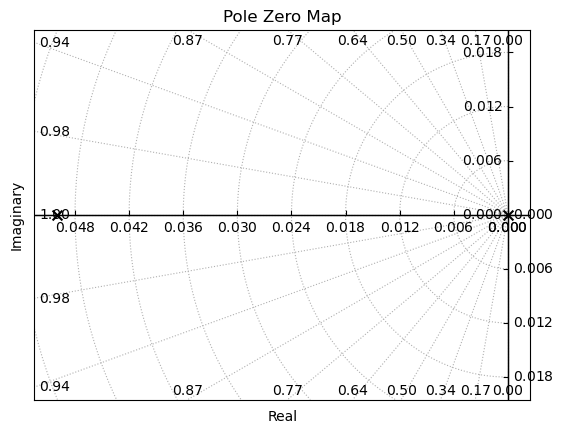

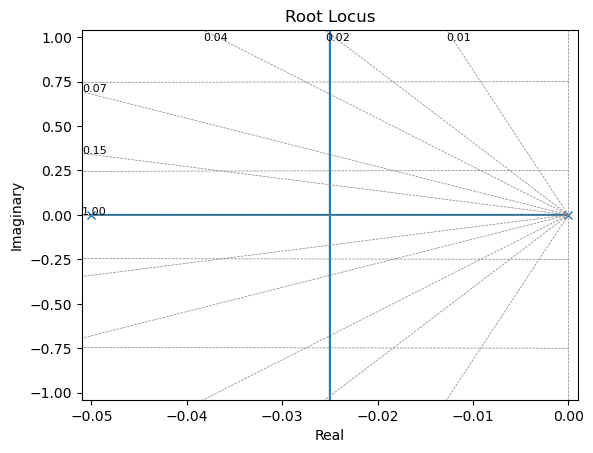

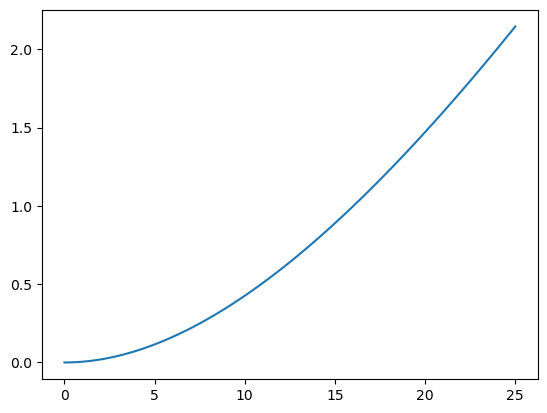

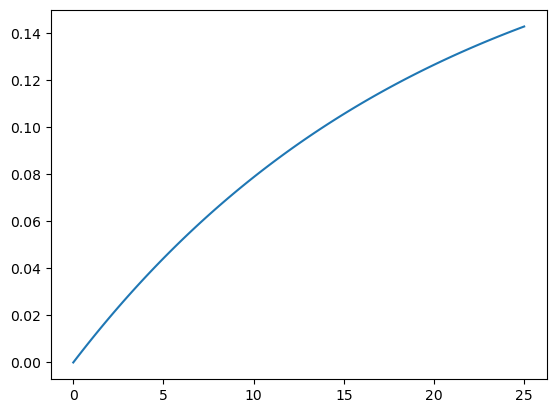

In [57]:
TF, polesTF, zerosTF = adcs_sym.syms2tf(TF, plot=True)


In [58]:
polesTF, zerosTF


(array([-0.05,  0.  ]), array([], dtype=float64))